<a href="https://colab.research.google.com/github/chanhyeong00/study_for_deep_learning_mini_project/blob/main/boston_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1/boston_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/altavish/boston-housing-dataset/data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('HousingData.csv')

### 데이터 전처리

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


506개 중 non-null이 506보다 작은 경우가 많다

이 데이터들은 NA로 표시되고 없애주어야 한다.

In [4]:
df = df.fillna(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


null 값이 모두 사라졌다.

<Axes: >

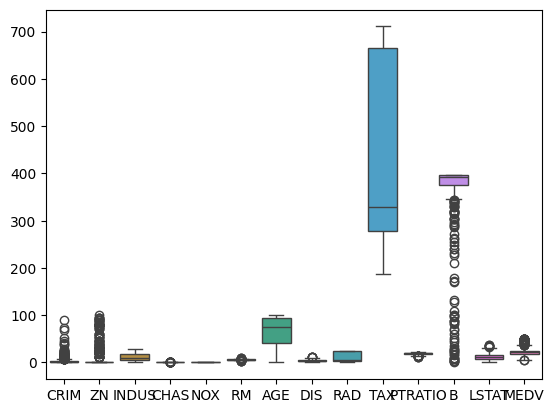

In [6]:
sns.boxplot(data=df)

<Axes: >

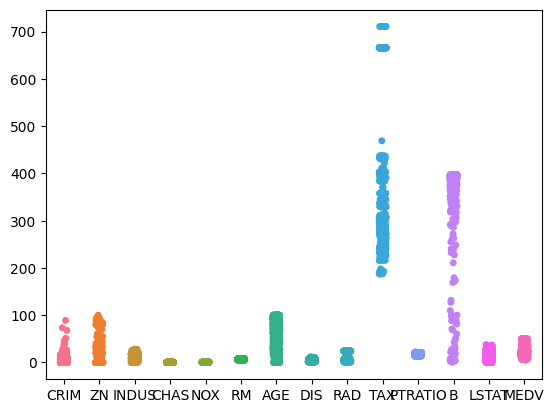

In [7]:
sns.stripplot(df)

#### 훈련세트, 테스트세트로 나누기

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X, y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   0.0  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [10]:
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


#### 데이터 스케일링

**정규화**

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
train_sc = sc.transform(X_train)
test_sc = sc.transform(X_test)

<Axes: >

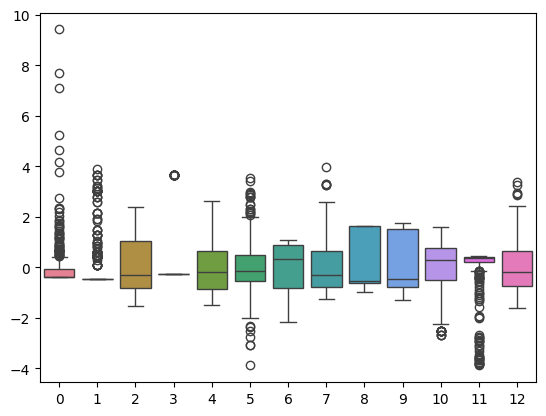

In [12]:
sns.boxplot(train_sc)

아직 튀는 값들이 보인다. 다른 방법으로 스케일링 하자

**Minmax**

In [13]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
train_mms = mms.transform(X_train)
test_mms = mms.transform(X_test)

In [14]:
type(train_mms)

numpy.ndarray

<Axes: >

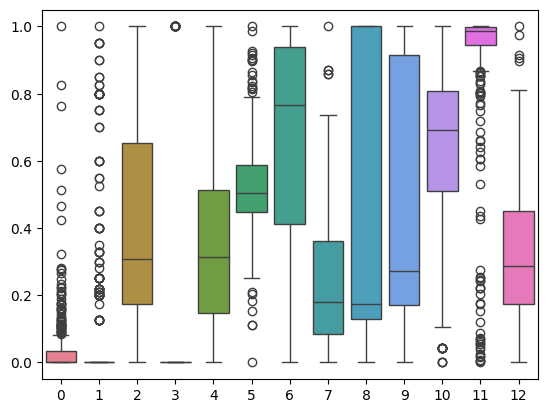

In [15]:
sns.boxplot(train_mms)

**aMaxAbsScaler**

In [16]:
from sklearn.preprocessing import MaxAbsScaler
mac = MaxAbsScaler()
mac.fit(X_train)
train_mac = mac.transform(X_train)
test_mac = mac.transform(X_test)

<Axes: >

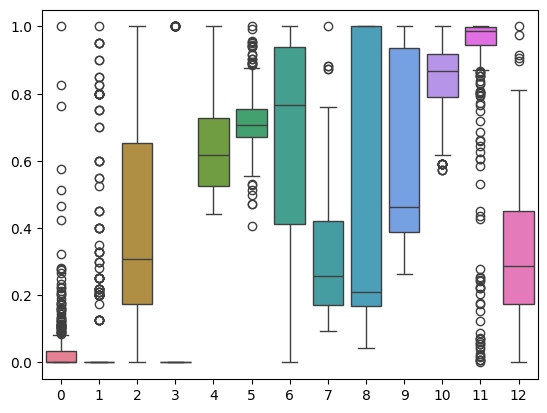

In [17]:
sns.boxplot(train_mac)

**nomalize**

In [18]:
from sklearn.preprocessing import Normalizer
nl = Normalizer()
nl.fit(X_train)
train_nl = nl.transform(X_train)
test_nl = nl.transform(X_test)

<Axes: >

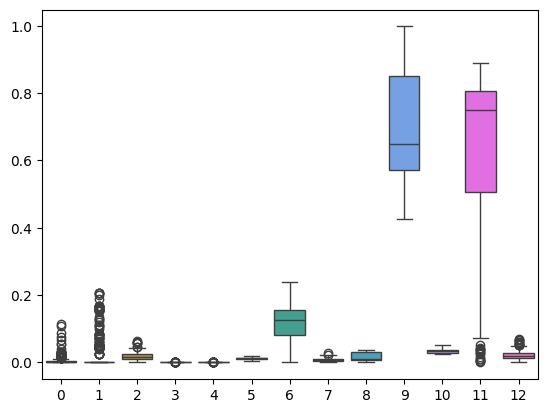

In [19]:
sns.boxplot(train_nl)

이중 몇 개를 골라서 비교해보겠다.

### 머신러닝 알고리즘

독립 변수(특성)가 여러개이므로 다중회귀 사용

**표준화**

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_sc, y_train)
print(model.score(test_sc, y_test))

0.7051048011389481


**max absolute**

In [21]:
model = LinearRegression()
model.fit(train_mac, y_train)
print(model.score(test_mac, y_test))

0.7051048011389476


**nomalize**

In [22]:
model = LinearRegression()
model.fit(train_nl, y_train)
print(model.score(test_nl, y_test))

0.7118291812770308


In [23]:
print(model.coef_, model.intercept_)

[-8.93107716e+01  8.49403237e+00 -1.01071652e+01  1.21067616e+03
 -6.46894523e+03  2.92896402e+03 -7.09723546e+00 -5.50243730e+02
  1.20830620e+02  2.28767363e+00 -4.73539978e+02  1.01812728e+01
 -1.83236214e+02] 9.926639329172906


노멀라이즈가 가장 높음

In [24]:
def predict(model, data):
  nl = Normalizer()
  nl.fit(data)
  data = nl.transform(data)
  return model.predict(data)

In [25]:
predict(model, [[0.04113, 25, 4.86, 0, 0.426, 6.727, 33.5, 5.4007, 4, 281, 19, 396.9, 5.29]])

array([28.54674451])

실제값 28로 나쁘지 않은 값을 예측함

### 오차 보기(성능 평가)

**mse**

In [26]:
from sklearn.metrics import mean_squared_error
pred = model.predict(test_nl)

mse = mean_squared_error(y_test, pred)

In [27]:
print(mse)

22.52915943120082


# 딥러닝

In [28]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(None,13), activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

#check_pt = tf.keras.callbacks.ModelCheckpoint('best-model-call1.h5', save_best_only=True)
#early = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_nl, y_train, epochs=500, validation_data=(test_nl, y_test))

Epoch 1/500
13/13 [==============================] - 3s 110ms/step - loss: 583.9581 - mse: 583.9581 - val_loss: 562.0680 - val_mse: 562.0680
Epoch 2/500
13/13 [==============================] - 0s 33ms/step - loss: 560.0267 - mse: 560.0267 - val_loss: 532.6212 - val_mse: 532.6212
Epoch 3/500
13/13 [==============================] - 0s 37ms/step - loss: 524.2264 - mse: 524.2264 - val_loss: 487.8317 - val_mse: 487.8317
Epoch 4/500
13/13 [==============================] - 0s 36ms/step - loss: 470.6886 - mse: 470.6886 - val_loss: 422.5182 - val_mse: 422.5182
Epoch 5/500
13/13 [==============================] - 0s 30ms/step - loss: 394.4098 - mse: 394.4098 - val_loss: 335.2680 - val_mse: 335.2680
Epoch 6/500
13/13 [==============================] - 0s 29ms/step - loss: 299.4596 - mse: 299.4596 - val_loss: 235.8639 - val_mse: 235.8639
Epoch 7/500
13/13 [==============================] - 0s 22ms/step - loss: 203.9633 - mse: 203.9633 - val_loss: 144.9503 - val_mse: 144.9503
Epoch 8/500
13/13 [

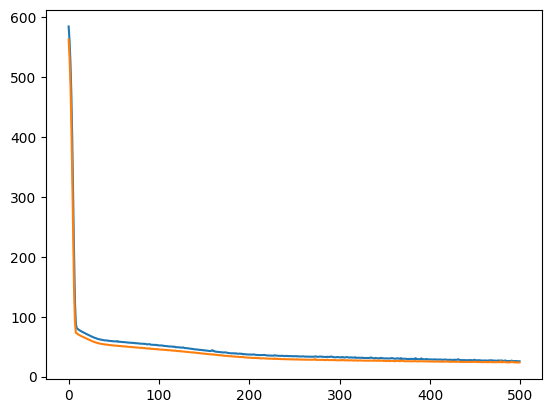

In [29]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

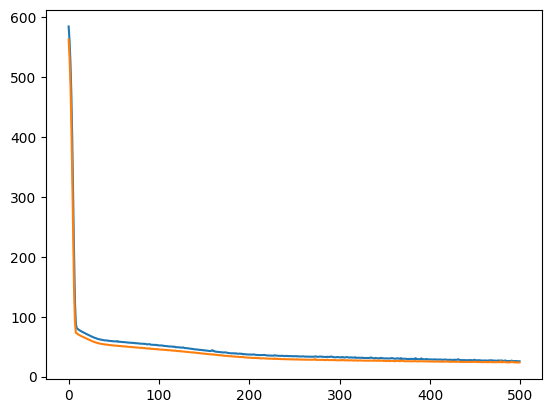

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [31]:
def predict(model, data):
  nl = Normalizer()
  nl.fit(data)
  data = nl.transform(data)
  return model.predict(data)
predict(model, [[0.04113, 25, 4.86, 0, 0.426, 6.727, 33.5, 5.4007, 4, 281, 19, 396.9, 5.29]])

1/1 [==============================] - 0s 94ms/step


array([[28.29874]], dtype=float32)

실제값 28로 가깝긴 하지만 조금 다르다. 계속해서 손실이 감소하는 것으로 보아 에폭을 늘리면 어떨까?

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(None,13), activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

#check_pt = tf.keras.callbacks.ModelCheckpoint('best-model-call1.h5', save_best_only=True)
#early = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_nl, y_train, epochs=700, validation_data=(test_nl, y_test))

Epoch 1/700
13/13 [==============================] - 1s 19ms/step - loss: 582.8916 - mse: 582.8916 - val_loss: 561.9505 - val_mse: 561.9505
Epoch 2/700
13/13 [==============================] - 0s 6ms/step - loss: 560.9504 - mse: 560.9504 - val_loss: 535.6100 - val_mse: 535.6100
Epoch 3/700
13/13 [==============================] - 0s 5ms/step - loss: 530.5193 - mse: 530.5193 - val_loss: 498.7957 - val_mse: 498.7957
Epoch 4/700
13/13 [==============================] - 0s 7ms/step - loss: 486.5067 - mse: 486.5067 - val_loss: 444.3539 - val_mse: 444.3539
Epoch 5/700
13/13 [==============================] - 0s 6ms/step - loss: 422.4856 - mse: 422.4856 - val_loss: 368.6333 - val_mse: 368.6333
Epoch 6/700
13/13 [==============================] - 0s 5ms/step - loss: 338.0253 - mse: 338.0253 - val_loss: 275.0902 - val_mse: 275.0902
Epoch 7/700
13/13 [==============================] - 0s 6ms/step - loss: 242.7072 - mse: 242.7072 - val_loss: 181.1008 - val_mse: 181.1008
Epoch 8/700
13/13 [=======

(0.0, 100.0)

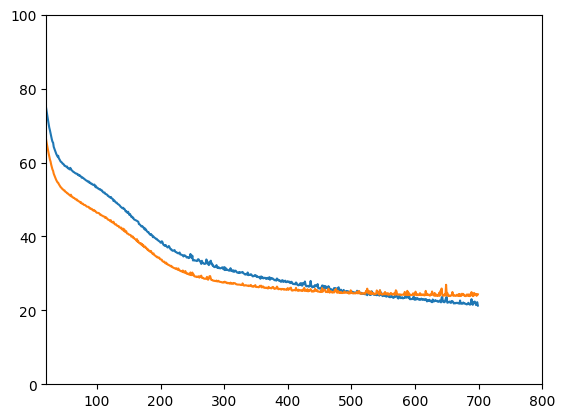

In [33]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlim([20, 800])
plt.ylim([0, 100])

(0.0, 100.0)

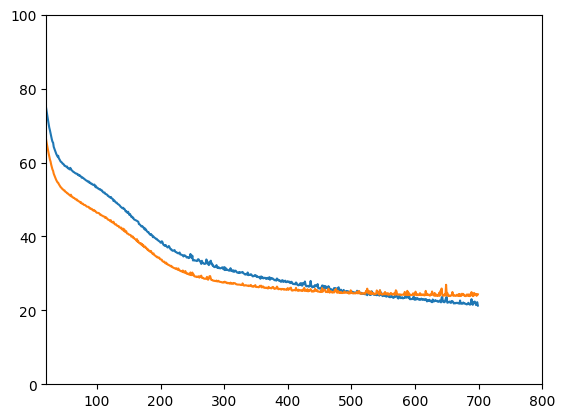

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlim([20, 800])
plt.ylim([0, 100])

에폭을 더 늘리니까 손실이 증가하는 것이 보인다.

500 안쪽이 적당한 에폭인 것 같다.

In [35]:
def predict(model, data):
  nl = Normalizer()
  nl.fit(data)
  data = nl.transform(data)
  return model.predict(data)
predict(model, [[0.04113, 25, 4.86, 0, 0.426, 6.727, 33.5, 5.4007, 4, 281, 19, 396.9, 5.29]])

1/1 [==============================] - 0s 72ms/step


array([[26.609749]], dtype=float32)

실제값보다 좀 낮게 예측한다.

또는 케라스 튜너로 하이퍼파라미터를 변경해볼 수 있다.

#### 케라스 튜너로 하이퍼파라미터 튜닝

In [36]:
pip install keras-tuner

In [37]:
from keras_tuner import RandomSearch

def build_model(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(
      units=hp.Int('units', min_value=10, max_value=64, step=2),
      input_shape=(None,13), activation='relu'))
  model.add(tf.keras.layers.Dense(64, activation='relu'))
  model.add(tf.keras.layers.Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['mse'])
  return model

In [38]:
tuner = RandomSearch(build_model,
                     objective='loss', max_trials=150,
                     executions_per_trial=3, directory='my_dir',
                     project_name='tun_model')

tuner.search(train_nl, y_train, epochs=500, verbose=0)
# 손실 최소화 , 너무 길어져서 verbose=0으로 지정

Reloading Tuner from my_dir/tun_model/tuner0.json


In [39]:
best_model = tuner.get_best_models(num_models=1)[0]

In [41]:
mse = mean_squared_error(best_model.predict(test_nl), y_test)

4/4 [==============================] - 0s 5ms/step


In [43]:
print(mse)

23.77357664272071


In [44]:
def predict(model, data):
  nl = Normalizer()
  nl.fit(data)
  data = nl.transform(data)
  return model.predict(data)
predict(best_model, [[0.04113, 25, 4.86, 0, 0.426, 6.727, 33.5, 5.4007, 4, 281, 19, 396.9, 5.29]])

1/1 [==============================] - 0s 26ms/step


array([[27.6247]], dtype=float32)

28과 근사하게 예측하는 것을 볼 수 있다.

In [46]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 62)          868       
                                                                 
 dense_1 (Dense)             (None, None, 64)          4032      
                                                                 
 dense_2 (Dense)             (None, None, 1)           65        
                                                                 
Total params: 4965 (19.39 KB)
Trainable params: 4965 (19.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


62개가 최적인 듯 하다 그렇다면 2번쨰 Dense 층도 62개로 훈련 해보겠다.

In [47]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(62, input_shape=(None,13), activation='relu'))
model.add(tf.keras.layers.Dense(62, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

#check_pt = tf.keras.callbacks.ModelCheckpoint('best-model-call1.h5', save_best_only=True)
#early = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_nl, y_train, epochs=500, validation_data=(test_nl, y_test))

Epoch 1/500
13/13 [==============================] - 2s 55ms/step - loss: 586.1876 - mse: 586.1876 - val_loss: 564.1669 - val_mse: 564.1669
Epoch 2/500
13/13 [==============================] - 0s 11ms/step - loss: 562.6805 - mse: 562.6805 - val_loss: 537.7456 - val_mse: 537.7456
Epoch 3/500
13/13 [==============================] - 0s 22ms/step - loss: 532.2394 - mse: 532.2394 - val_loss: 500.7452 - val_mse: 500.7452
Epoch 4/500
13/13 [==============================] - 0s 20ms/step - loss: 487.6390 - mse: 487.6390 - val_loss: 446.2684 - val_mse: 446.2684
Epoch 5/500
13/13 [==============================] - 0s 15ms/step - loss: 424.8011 - mse: 424.8011 - val_loss: 371.3756 - val_mse: 371.3756
Epoch 6/500
13/13 [==============================] - 0s 9ms/step - loss: 341.6783 - mse: 341.6783 - val_loss: 280.7081 - val_mse: 280.7081
Epoch 7/500
13/13 [==============================] - 0s 19ms/step - loss: 247.2494 - mse: 247.2494 - val_loss: 187.0435 - val_mse: 187.0435
Epoch 8/500
13/13 [==

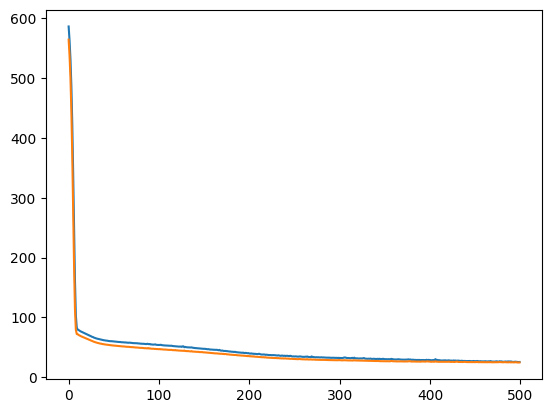

In [48]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

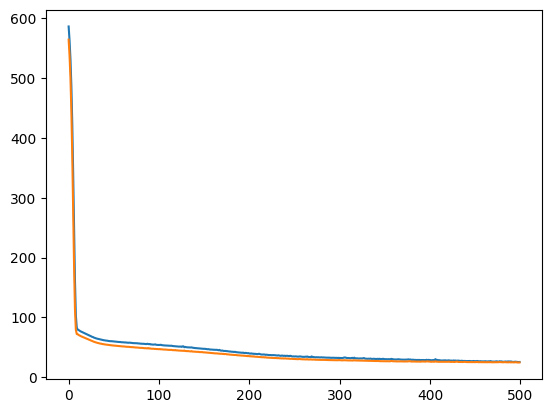

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

그래프로 매우 안정적이고 과대, 과소 적합 없이 거의 일치한다.

예측값 또한 거의 완벽하게 측정하는 것을 확인할 수 있다.

In [86]:
def predict(model, data):
  nl = Normalizer()
  nl.fit(data)
  data = nl.transform(data)
  return model.predict(data)
predict(model, [[0.04113, 25, 4.86, 0, 0.426, 6.727, 33.5, 5.4007, 4, 281, 19, 396.9, 5.29]])

1/1 [==============================] - 0s 39ms/step


array([[28.125288]], dtype=float32)

In [52]:
mean_squared_error(model.predict(test_nl), y_test)

4/4 [==============================] - 0s 3ms/step


24.797285658690598

### 모델 저장하기

In [56]:
model_name = 'boston_saved_best_model'
tf.saved_model.save(model, model_name)

### 텐서플로 라이트로 모델 변환하기

In [58]:
converter = tf.lite.TFLiteConverter.from_saved_model(model_name)
tflite_model = converter.convert()
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
  f.write(tflite_model)

In [84]:
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

def set_data(data):
  nl = Normalizer()
  nl.fit(data)
  data = nl.transform(data)
  return data

data = np.array([set_data([[0.04113, 25, 4.86, 0, 0.426, 6.727, 33.5, 5.4007, 4, 281, 19, 396.9, 5.29]])]).astype(np.float32)
# 3차원을 입력과 float형으로 받는 것 같다. 3차원으로 받는 이유는 무엇일까?
pred = interpreter.set_tensor(input_index, data)
interpreter.invoke()
interpreter.get_tensor(output_index)



array([[[28.12529]]], dtype=float32)

불러온 모델은 위의 값과 일치(반올림 해서 5번째 자리에서 끝난 것이다)